# Salary Prediciton

In [1]:
#importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#our dataset
dataset=pd.read_csv('Salary Prediction of Data Professions.csv')

In [3]:
dataset.head()


,FIRST NAME,LAST NAME,SEX,DOJ,CURRENT DATE,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP
0,TOMASA,ARMEN,F,5-18-2014,01-07-2016,Analyst,21.0,44570,Finance,24.0,6.0,2.0,0
1,ANNIE,NaN,F,NaN,01-07-2016,Associate,NaN,89207,Web,NaN,13.0,NaN,7
2,OLIVE,ANCY,F,7-28-2014,01-07-2016,Analyst,21.0,40955,Finance,23.0,7.0,3.0,0
3,CHERRY,AQUILAR,F,04-03-2013,01-07-2016,Analyst,22.0,45550,IT,22.0,8.0,3.0,0
4,LEON,ABOULAHOUD,M,11-20-2014,01-07-2016,Analyst,NaN,43161,Operations,27.0,3.0,NaN,3


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2639 entries, 0 to 2638
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   FIRST NAME        2639 non-null   object 
 1   LAST NAME         2637 non-null   object 
 2   SEX               2639 non-null   object 
 3   DOJ               2638 non-null   object 
 4   CURRENT DATE      2639 non-null   object 
 5   DESIGNATION       2639 non-null   object 
 6   AGE               2636 non-null   float64
 7   SALARY            2639 non-null   int64  
 8   UNIT              2639 non-null   object 
 9   LEAVES USED       2636 non-null   float64
 10  LEAVES REMAINING  2637 non-null   float64
 11  RATINGS           2637 non-null   float64
 12  PAST EXP          2639 non-null   int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 268.2+ KB


In [5]:
dataset.columns

Index(['FIRST NAME', 'LAST NAME', 'SEX', 'DOJ', 'CURRENT DATE', 'DESIGNATION',
       'AGE', 'SALARY', 'UNIT', 'LEAVES USED', 'LEAVES REMAINING', 'RATINGS',
       'PAST EXP'],
      dtype='object')

In [6]:
#Here from looking at this point and the problem we dont requires certain features im gonna drop it
dataset.drop(columns=['FIRST NAME', 'LAST NAME','DOJ', 'CURRENT DATE','LEAVES USED', 'LEAVES REMAINING'],inplace=True)

# Data Cleaning Part

In [7]:
dataset.isnull().sum()

SEX            0
DESIGNATION    0
AGE            3
SALARY         0
UNIT           0
RATINGS        2
PAST EXP       0
dtype: int64

In [8]:
#Lets just drop null valued columns
dataset.dropna(inplace=True)
print(dataset.shape)

(2636, 7)


In [9]:
#Lets Check for any duplicate values
dataset[dataset.duplicated()]

,SEX,DESIGNATION,AGE,SALARY,UNIT,RATINGS,PAST EXP
104,F,Senior Analyst,28.0,66338,Web,3.0,5
248,M,Senior Analyst,25.0,68505,Operations,3.0,1
400,M,Senior Analyst,27.0,61575,Finance,2.0,1
422,F,Analyst,24.0,43137,IT,2.0,2
446,M,Analyst,25.0,43352,Finance,4.0,2
...,...,...,...,...,...,...,...
2576,M,Analyst,23.0,41052,IT,5.0,1
2591,M,Analyst,24.0,48651,Web,5.0,1
2600,F,Analyst,25.0,49559,Management,5.0,2
2624,M,Analyst,22.0,45364,Web,2.0,0


In [10]:
dataset.drop_duplicates(inplace=True)

In [11]:
print(dataset['DESIGNATION'].value_counts())
print(dataset['UNIT'].value_counts())
print(dataset['PAST EXP'].value_counts())
print(dataset['SEX'].value_counts())

DESIGNATION
Analyst           1850
Senior Analyst     301
Associate          155
Manager             79
Senior Manager      61
Director            27
Name: count, dtype: int64
UNIT
IT            436
Finance       416
Operations    415
Marketing     410
Web           399
Management    397
Name: count, dtype: int64
PAST EXP
0     1227
1      460
2      339
3      152
5       51
4       51
6       46
8       27
7       25
10      20
11      17
9       17
12      10
13      10
17       5
15       5
14       4
16       3
18       2
19       1
23       1
Name: count, dtype: int64
SEX
F    1258
M    1215
Name: count, dtype: int64


In [12]:
#Let just mixup the Designation and unit part to get the Job Role
dataset['JOB ROLE']=dataset['UNIT']+dataset['DESIGNATION']

In [13]:
dataset

,SEX,DESIGNATION,AGE,SALARY,UNIT,RATINGS,PAST EXP,JOB ROLE
0,F,Analyst,21.0,44570,Finance,2.0,0,FinanceAnalyst
2,F,Analyst,21.0,40955,Finance,3.0,0,FinanceAnalyst
3,F,Analyst,22.0,45550,IT,3.0,0,ITAnalyst
5,F,Analyst,22.0,48736,Marketing,4.0,0,MarketingAnalyst
6,M,Analyst,22.0,40339,Marketing,5.0,0,MarketingAnalyst
...,...,...,...,...,...,...,...,...
2634,F,Senior Manager,36.0,185977,Management,5.0,10,ManagementSenior Manager
2635,F,Analyst,23.0,45758,IT,2.0,0,ITAnalyst
2636,F,Analyst,21.0,47315,Web,5.0,0,WebAnalyst
2637,F,Analyst,24.0,45172,Web,3.0,1,WebAnalyst


# LETS EXPLORE THE DATA (EXPLORATORY ANALYSIS)


In [14]:
dataset.describe()

,AGE,SALARY,RATINGS,PAST EXP
count,2473.000000,2473.000000,2473.000000,2473.000000
mean,24.728670,58089.506268,3.481601,1.557622
std,3.913452,36812.837002,1.115755,2.706521
min,21.000000,40001.000000,2.000000,0.000000
25%,22.000000,43415.000000,2.000000,0.000000
50%,24.000000,46741.000000,3.000000,1.000000
75%,25.000000,50343.000000,4.000000,2.000000
max,45.000000,388112.000000,5.000000,23.000000


<Axes: >

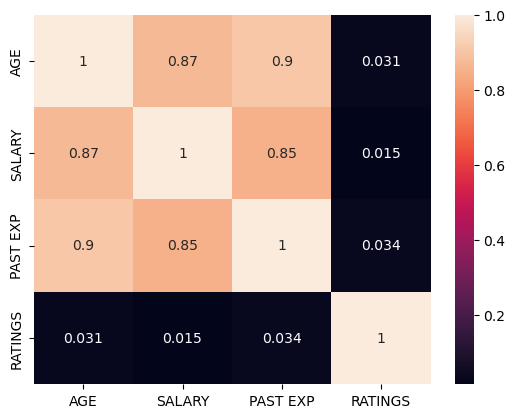

In [15]:
#FINDINGCORRELATION BETWEEN THE NUMERICAL COLUMNS
corr=dataset[['AGE','SALARY','PAST EXP','RATINGS']].corr()
sns.heatmap(corr,annot=True)

In [16]:
#AT LOOKING AT THE RATING WITH RESPECT TO SALARY THERE IS NOT REALLY A STRONG RELATION BETWEEN THIS COLUMN 
#IM GONNA DROP IT LATER ON


Text(0.5, 1.0, "JOB ROLE's VALUE COUNT")

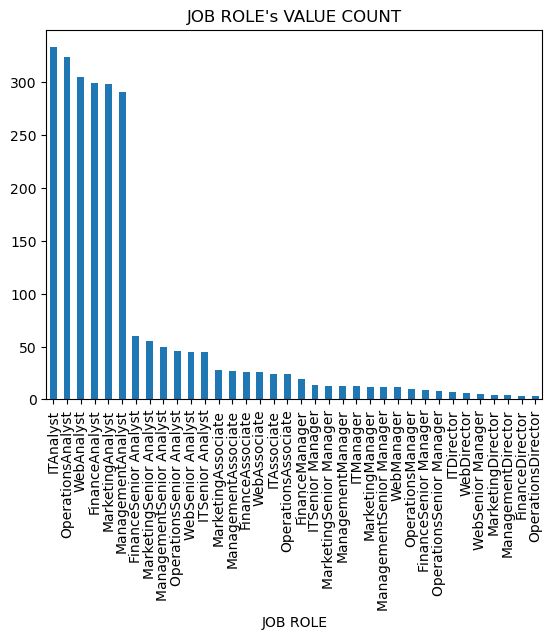

In [17]:
dataset['JOB ROLE'].value_counts().plot(kind='bar')
plt.title("JOB ROLE's VALUE COUNT")

/Users/jaypanchal/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


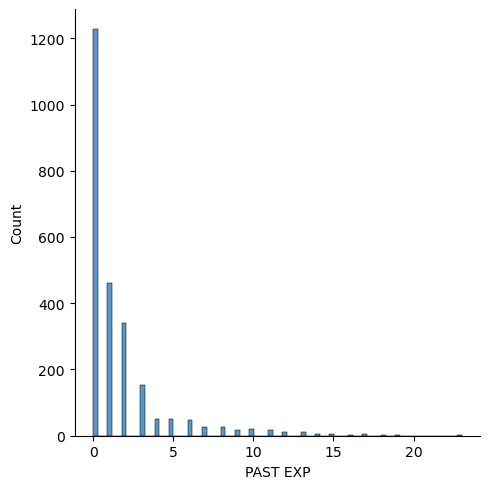

In [18]:
sns.displot(dataset['PAST EXP'])

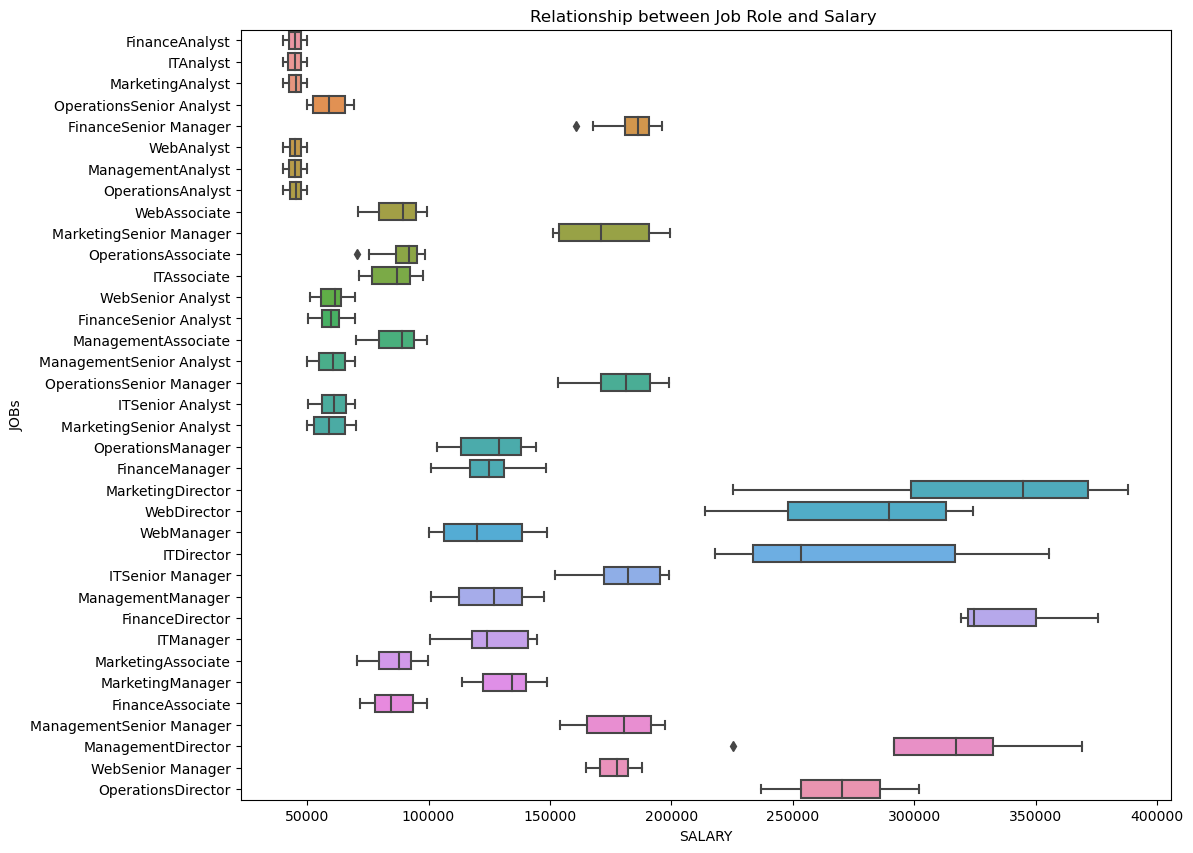

In [19]:
plt.figure(figsize=(12, 10))
sns.boxplot(x='SALARY', y='JOB ROLE', data=dataset)
plt.title('Relationship between Job Role and Salary ')
plt.xlabel('SALARY')
plt.ylabel('JOBs')
plt.show()

In [20]:
#LETS JUST SORT THE OUTLIERS HERE
def calculate_grouped_statistics(df, categorical_column, numerical_column):
    def calculate_quantiles(x):
        Q1 = x.quantile(0.25)
        Q2 = x.median()
        Q3 = x.quantile(0.75)
        IQR = Q3 - Q1
        Qlower=Q1-(1.5*IQR)
        Qupper=Q3+(1.5*IQR)
        return pd.DataFrame({
            'Qlower':Qlower,
            'Q1':Q1,
            'Q2':Q2,
            'Q3':Q3,
            'Qupper':Qupper,
            'IQR':IQR
             },index=[0])
    
    # Group by the categorical column and calculate the statistics for the numerical column
    grouped_stats = df.groupby(categorical_column)[numerical_column].apply(calculate_quantiles).reset_index()
    
    return grouped_stats


stats = calculate_grouped_statistics(dataset, 'JOB ROLE', 'SALARY')
stats

,JOB ROLE,level_1,Qlower,Q1,Q2,Q3,Qupper,IQR
0,FinanceAnalyst,0,34814.750,42432.50,44828.0,47511.00,55128.750,5078.50
1,FinanceAssociate,0,54635.250,78037.50,84612.0,93639.00,117041.250,15601.50
2,FinanceDirector,0,279915.000,322095.00,324783.0,350215.00,392395.000,28120.00
3,FinanceManager,0,95597.250,116953.50,124711.0,131191.00,152547.250,14237.50
4,FinanceSenior Analyst,0,45874.500,56242.50,59900.0,63154.50,73522.500,6912.00
5,FinanceSenior Manager,0,166006.000,180778.00,186356.0,190626.00,205398.000,9848.00
6,ITAnalyst,0,33830.000,42086.00,44925.0,47590.00,55846.000,5504.00
7,ITAssociate,0,53287.875,76788.75,87007.5,92456.00,115956.875,15667.25
8,ITDirector,0,108776.750,233528.00,253284.0,316695.50,441446.750,83167.50
9,ITManager,0,83014.500,117726.00,124154.0,140867.00,175578.500,23141.00


In [21]:
print(dataset[(dataset['JOB ROLE']=='FinanceSenior Manager')&(dataset['SALARY']<166006.000)])
print(dataset[(dataset['JOB ROLE']=='ManagementDirector')&(dataset['SALARY']<230971.500)])
print(dataset[(dataset['JOB ROLE']=='OperationsAssociate')&(dataset['SALARY']<73829)])

   SEX     DESIGNATION   AGE  SALARY     UNIT  RATINGS  PAST EXP  \
11   M  Senior Manager  36.0  160613  Finance      2.0         9   

                 JOB ROLE  
11  FinanceSenior Manager  
     SEX DESIGNATION   AGE  SALARY        UNIT  RATINGS  PAST EXP  \
1771   M    Director  44.0  225339  Management      5.0        16   

                JOB ROLE  
1771  ManagementDirector  
     SEX DESIGNATION   AGE  SALARY        UNIT  RATINGS  PAST EXP  \
1894   F   Associate  28.0   70589  Operations      5.0         0   

                 JOB ROLE  
1894  OperationsAssociate  


In [22]:
dataset.drop([11,1771,1894],inplace=True)

In [23]:
dataset

,SEX,DESIGNATION,AGE,SALARY,UNIT,RATINGS,PAST EXP,JOB ROLE
0,F,Analyst,21.0,44570,Finance,2.0,0,FinanceAnalyst
2,F,Analyst,21.0,40955,Finance,3.0,0,FinanceAnalyst
3,F,Analyst,22.0,45550,IT,3.0,0,ITAnalyst
5,F,Analyst,22.0,48736,Marketing,4.0,0,MarketingAnalyst
6,M,Analyst,22.0,40339,Marketing,5.0,0,MarketingAnalyst
...,...,...,...,...,...,...,...,...
2634,F,Senior Manager,36.0,185977,Management,5.0,10,ManagementSenior Manager
2635,F,Analyst,23.0,45758,IT,2.0,0,ITAnalyst
2636,F,Analyst,21.0,47315,Web,5.0,0,WebAnalyst
2637,F,Analyst,24.0,45172,Web,3.0,1,WebAnalyst


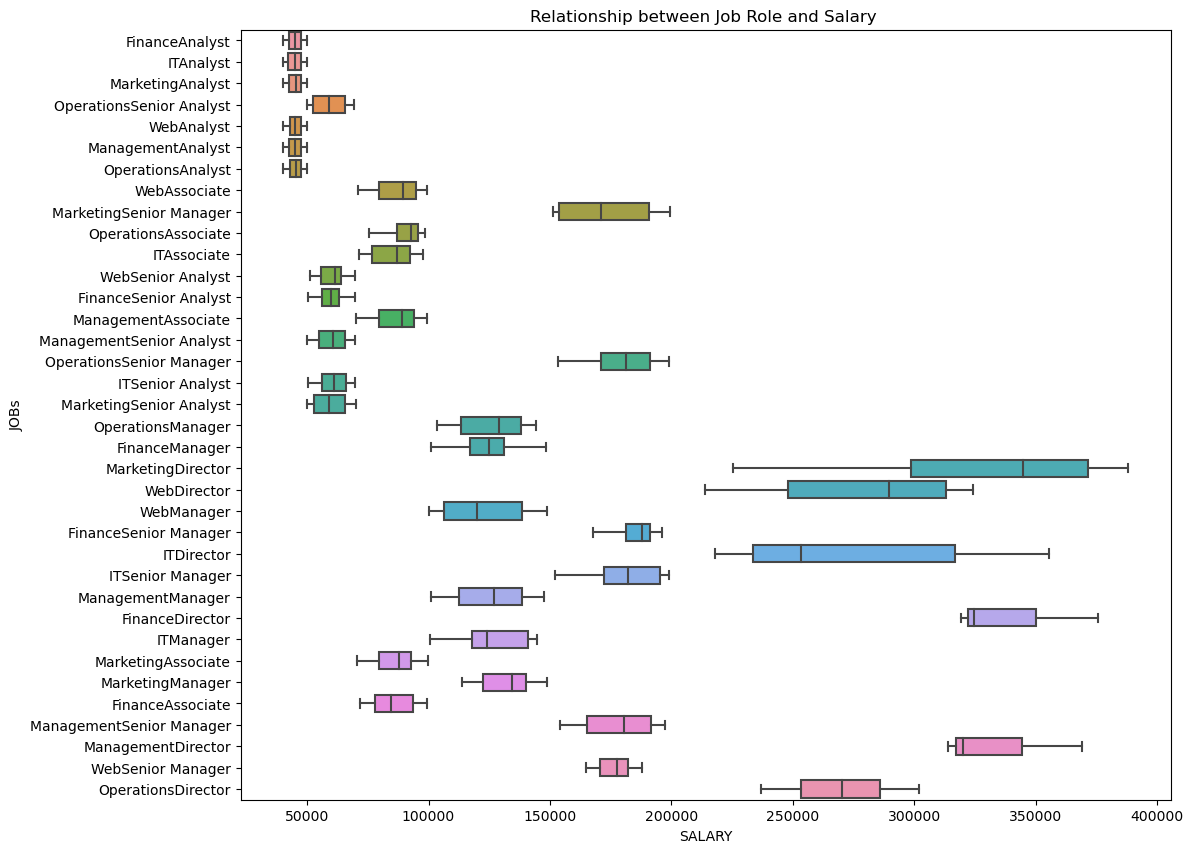

In [24]:
plt.figure(figsize=(12, 10))
sns.boxplot(x='SALARY', y='JOB ROLE', data=dataset)
plt.title('Relationship between Job Role and Salary ')
plt.xlabel('SALARY')
plt.ylabel('JOBs')
plt.show()
#WE VE CLEARED OUTLIERS OF SPECIFIC ROLES

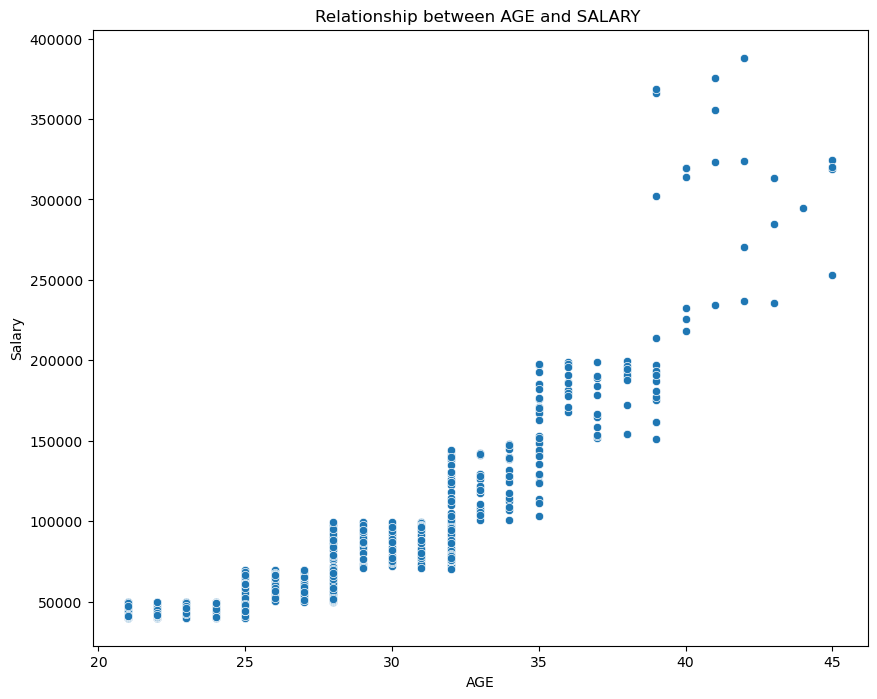

In [44]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='AGE', y='SALARY', data=dataset)
plt.title('Relationship between AGE and SALARY ')
plt.xlabel('AGE')
plt.ylabel('Salary')
plt.show()

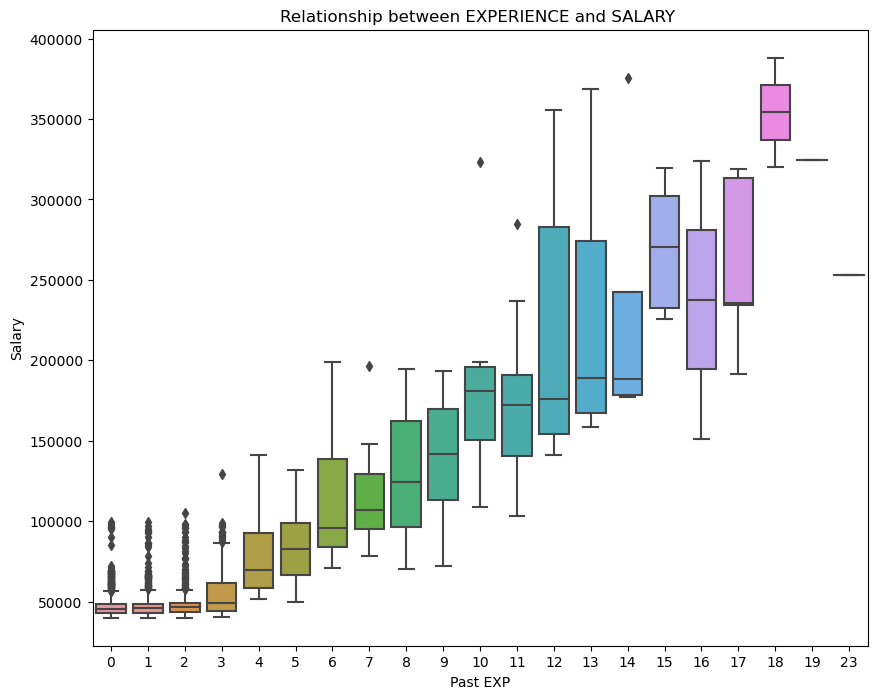

In [26]:
plt.figure(figsize=(10, 8))
sns.boxplot(x='PAST EXP', y='SALARY', data=dataset)
plt.title('Relationship between EXPERIENCE and SALARY ')
plt.xlabel('Past EXP')
plt.ylabel('Salary')
plt.show()

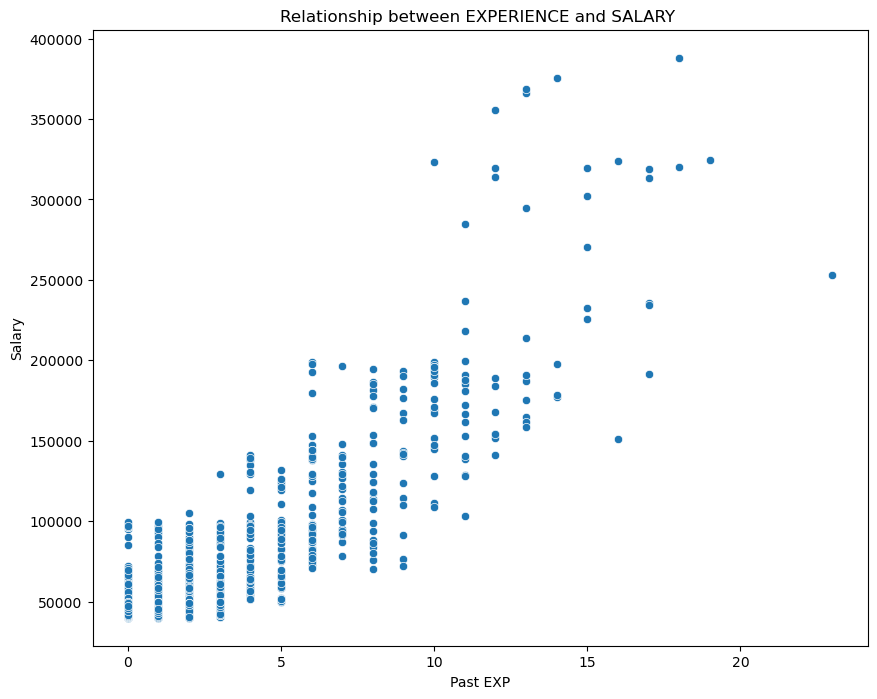

In [27]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PAST EXP', y='SALARY', data=dataset)
plt.title('Relationship between EXPERIENCE and SALARY ')
plt.xlabel('Past EXP')
plt.ylabel('Salary')
plt.show()

<Axes: xlabel='SEX'>

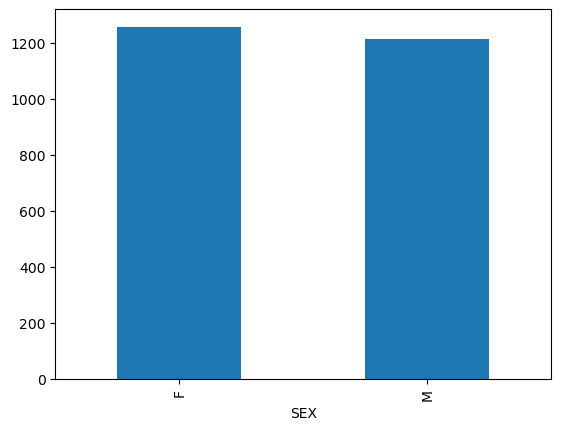

In [28]:
dataset['SEX'].value_counts().plot(kind='bar')
#THE RATIO OF MEN AND WOMEN ARE SAME NOT GIVE ANY INFORMATION

# Feature Engineering and model training

In [29]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor ,GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

In [30]:
X=dataset[['JOB ROLE','PAST EXP']]
y=dataset['SALARY']

In [31]:
numericalfeatures = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categoricalfeatures = X.select_dtypes(include=['object']).columns.tolist()

#Fetching numerial and categorial features

In [32]:
numericaltransformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

In [33]:
categoricaltransformer=Pipeline(steps=[
    ('ordinal',OrdinalEncoder())
])

In [34]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num',numericaltransformer,numericalfeatures),
        ('cat', categoricaltransformer, categoricalfeatures)
    ])

In [35]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)

In [36]:
models = [
    ('Linear Regression', LinearRegression()),
    ('Decision Tree', DecisionTreeRegressor()),
    ('Random Forest', RandomForestRegressor(n_estimators=100)),
    ('Gradient Boosting', GradientBoostingRegressor(n_estimators=100))
]
for name, model in models:
    tryingmodels = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', model)
])
    tryingmodels.fit(X_train, y_train)  # Train the model
    y_pred = tryingmodels.predict(X_test)  # Predict on the test set
    mse = mean_squared_error(y_test, y_pred)  # Mean Squared Error
    r2 = r2_score(y_test, y_pred)  # R-squared score
    print(f"{name}:")
    print(f"  MSE: {mse}")
    print(f"  R-squared: {r2}\n")

Linear Regression:
  MSE: 427821684.1295821
  R-squared: 0.6801131283715738

Decision Tree:
  MSE: 113826261.02143896
  R-squared: 0.9148908811824504

Random Forest:
  MSE: 179659945.6401148
  R-squared: 0.8656663275853447

Gradient Boosting:
  MSE: 244496335.56325436
  R-squared: 0.817187461951428



In [37]:
model = Pipeline(steps=[
   ('preprocessor', preprocessor),
    ('regressor', DecisionTreeRegressor())
])

In [38]:
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['PAST EXP']),
                                                 ('cat',
                                                  Pipeline(steps=[('ordinal',
                                                                   OrdinalEncoder())]),
                                                  ['JOB ROLE'])])),
                ('regressor', DecisionTreeRegressor())])

In [39]:
y_pred = model.predict(X_test)

In [40]:
y_test

1089     47755
2316    128247
1792     56028
1615     42322
359      41354
         ...  
505      40403
2267     88069
1071     48317
2047     66747
173      48802
Name: SALARY, Length: 494, dtype: int64

In [41]:
y_pred

array([ 45161.55769231, 136815.25      ,  58922.38461538,  44767.3006993 ,
        45194.66176471,  57824.        ,  60219.38461538,  45194.66176471,
        44767.3006993 ,  44947.10062893,  44767.3006993 ,  81199.66666667,
       138026.        ,  45684.25      ,  44839.43902439,  44767.3006993 ,
        45161.55769231, 176567.        ,  44689.32692308,  45194.66176471,
        44947.10062893,  45194.66176471,  45161.55769231,  45048.04794521,
        45161.55769231,  44975.86666667,  45684.25      ,  90655.8       ,
        44947.10062893,  44683.33333333,  57561.68421053,  44839.43902439,
        80367.        ,  45161.55769231,  84662.        ,  45161.55769231,
        44947.10062893,  45048.04794521,  44767.3006993 ,  91165.        ,
        45194.66176471,  44914.58695652,  44947.10062893,  45876.55555556,
        44683.33333333,  45597.4       ,  45194.66176471,  45684.25      ,
        45048.04794521,  44947.10062893,  44683.33333333,  91980.5       ,
        44914.58695652,  

In [42]:
data=pd.DataFrame({
    'JOB ROLE':'WebDirector',
    'PAST EXP':10.0,
},index=[0])

In [43]:
model.predict(data)

array([284733.])